So I just watched a video about Hilbert curves on 3blue1brown's youtube channel and you can watch it [here](https://www.youtube.com/watch?v=3s7h2MHQtxc). Here he also explains about the notion of people hearing through pictures. I was immediately hooked and had to do some investigation. In this post I will go through the theory, but really just watch the video it is amazing, then I will generate Hilbert curves for images and create their sound version.

***

This notebook runs on Julia 1.1 with the manifest file in the folder. First we need to instantiate it to download the packages in the new notebook environment.

In [1]:
using Pkg; Pkg.activate("."); Pkg.instantiate();

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %

# Hilbert space filling curve

In [2]:
using HilbertSpaceFillingCurve, Colors, Images

Fractal space filling curves

Relevant xkcd: https://xkcd.com/195/

Image from https://en.wikipedia.org/wiki/Hilbert_curve

![hilbert](http://localhost:8888/notebooks/Hilbert_curve_3.svg)

We can first generate a 2d sinusoid from $0$ to $\pi$ using 4 pixels per side.

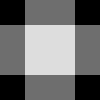

In [171]:
function sin_2d(;s = 4, range_min = 1.0, range_max = 1.0)
    p = ones(s, s)
    r_x = collect(range(0.0, length=s, stop=range_min*π))
    r_y = collect(range(range_max*π, length=s, stop=0.0))

    for i in collect(1:s)
        for j in collect(1:s)
            p[j, i] = sin(r_x[i]) + sin(r_y[j])
        end
    end
    
    p = p / 2.
    
    return p
end

dim4 = 4
p4 = sin_2d(s=dim4)
img4 = Gray.(p4)

Pretty pixelated, but hey it's only 16 pixels. Next we need to store the pancaked version of the image where the read path is defined by a Hilbert curve.

In [172]:
function hilbertize!(x, y, himg, p; s = 4)
    for d = 0:1:s^2-1
        hilb = hilbert(d, 2, 16)
        push!(x, hilb[1]) 
        push!(y, hilb[2])
        himg[d+1] = p[hilb[1]+1, hilb[2]+1]
    end
end

hilbertize! (generic function with 3 methods)

And then call the function to perform the fractal traverse.

In [173]:
himg4 = zeros(dim4^2)
x4, y4 = Int[], Int[]
hilbertize!(x4, y4, himg4, p4, s=dim4);

Next we can plot the coordinates of the Hilbert curve and see the path which was used for the traverse and the extracted pixel grayscale value based on that path.

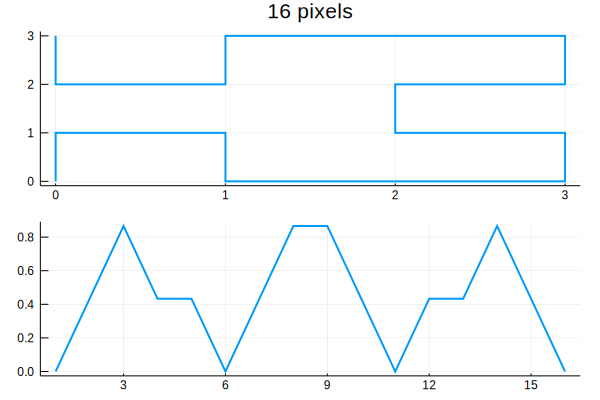

In [198]:
using Plots
p4_hilb = plot(x4, y4, title="16 pixels")
p4_data = plot(himg4)
plot(p4_hilb, p4_data, legend=false, fmt=:svg, layout=(2, 1), width=2)

We can now compare between different sampling density and the idea behind the Hilbert curve is that we should preserve the shape. For this we can use our $4\times 4$ pixel image and compare it with a say $16\times 16$ one.

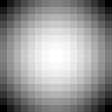

In [195]:
dim16 = 16
p16 = sin_2d(s=dim16)
img16 = Gray.(p16)

As expected more detail is shown in the image.

In [196]:
himg16 = zeros(dim16^2)
x16, y16 = Int[], Int[]
hilbertize!(x16, y16, himg16, p16, s=dim16);

And we can compare the results with the $4 \times 4$ pixel image.

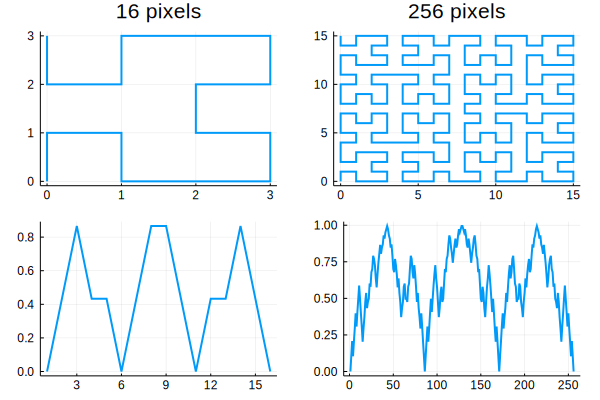

In [199]:
p16_hilb = plot(x16, y16, title="256 pixels")
p16_data = plot(himg16)
plot(p4_hilb, p16_hilb, p4_data, p16_data, legend=false, fmt=:svg, layout=(2, 2), width=2)

The result shows us that the shape is preserved and the increase of sampling points leads to more information or noise depending on how successful we are.

# Sounds in Julia

We can generate sounds in Julia using the WAV library. The sounds consist of a time axis measured in miliseconds ands the value axis which is the sound value.

In [200]:
using WAV

In [228]:
x = [0:dim16^2-1;]
y = himg16
wavwrite(y, "example.wav", Fs=1)

#y, fs = wavread("example.wav")
wavplay(y, fs)

In [221]:
x = [0:dim4^2-1;]
y = himg4
wavwrite(y, "example.wav", Fs=2000)

#y, fs = wavread("example.wav")
wavplay(y, fs)

In [205]:
y

40000×1 Array{Float64,2}:
 0.0                  
 0.00031415926059708  
 0.0006283184629864991
 0.0009424776653759181
 0.0012566366931423545
 0.00157079566270113  
 0.0018849545158445835
 0.0021991131361573935
 0.0025132715236395597
 0.0028274296782910824
 0.0031415876001119614
 0.003455745056271553 
 0.003769902279600501 
 ⋮                    
 0.9999929070472717   
 0.9999940395355225   
 0.9999950528144836   
 0.9999960064888      
 0.9999968409538269   
 0.9999975562095642   
 0.9999982118606567   
 0.9999987483024597   
 0.9999992251396179   
 0.9999995827674866   
 0.9999998211860657   
 0.9999999403953552   

<audio controls src="http://localhost:8888/notebooks/piano2.wav">
</audio>